# ML_Finance Lab - Week 4 - Support Vector Machines (SVM) and Decision Tree

### Aims:
    * Generate your own data to test classifiers
    * Practice Support Vector Machine - tuning soft margin and kernel parameters
    * Practise Decision Tree and Random Forest
    

In [ ]:
# %pip install numpy
# %pip install matplotlib
# # %pip install pylab
# %pip install matplotlib
# %pip install -U scikit-learn

  Using cached scikit_learn-1.8.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.17.0-cp311-cp311-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp311-cp311-macosx_12_0_arm64.whl (8.1 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached scipy-1.17.0-cp311-cp311-macosx_14_0_arm64.whl (20.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

### Task 1: Generate your own data to test binary classifiers

Generate two dimensional Gaussian distributed data for two different classes

 * Generate multivariate Guassian random samples: 
         https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html
         
 * Plot is based on $$\mbox{class 0}: \mu_0 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \Sigma_0=\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$$, $$\mbox{class 1}: \mu_1 = \begin{bmatrix} 7 \\ 7 \end{bmatrix}, \Sigma_1=\begin{bmatrix} 2 & 0 \\ 0 & 2 \end{bmatrix}$$ 

In [3]:
np.random.seed(seed=42)

# sample size per class
n0 = 300
n1 = 300

# Data of class 0
mu0 = np.array([0.0, 0.0])
Sigma0 = np.array([[1.0, 0.6],
                   [0.6, 1.2]])

# Data of class 1
mu1 = np.array([2.0, 2.5])
Sigma1 = np.array([[1.1, -0.4],
                   [-0.4, 0.9]])

# Combine data and labels into X and t
# Generate multivariate Gaussian samples
X0 = np.random.multivariate_normal(mean=mu0, cov=Sigma0, size=n0)
X1 = np.random.multivariate_normal(mean=mu1, cov=Sigma1, size=n1)

# Stack into one dataset
X = np.vstack([X0, X1])                 # shape: (n0+n1, 2)
y = np.hstack([np.zeros(n0), np.ones(n1)]).astype(int)  # shape: (n0+n1,)

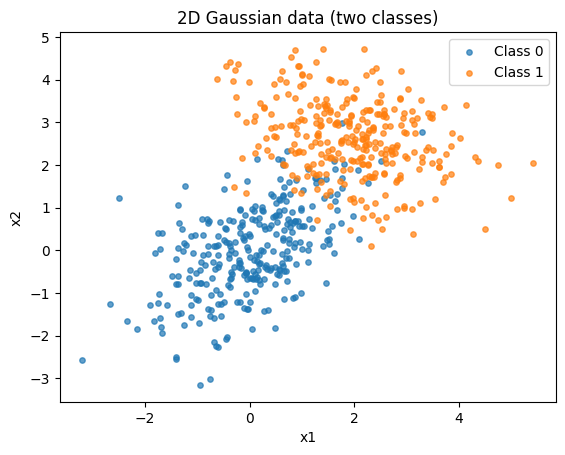

In [4]:
plt.scatter(X0[:, 0], X0[:, 1], s=15, alpha=0.7, label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1], s=15, alpha=0.7, label="Class 1")
plt.legend()
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("2D Gaussian data (two classes)")
plt.show()

### Task 2: Use SVM on generated data, with different margins and kernerls.

Reference to SVM in sklearn:
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].


def plot_decision_boundary(clf, X, y, h=0.02, padding=0.5):
    # 1) Define mesh limits
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding

    # 2) Create mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # 3) Predict class for each mesh point
    grid = np.c_[xx.ravel(), yy.ravel()]          # shape: (num_points, 2)
    Z = clf.predict(grid)                          # predicted labels
    Z = Z.reshape(xx.shape)                        # reshape back to mesh shape

    # 4) Plot decision regions + training points
    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)            # region colors
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k", alpha=0.9)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Decision boundary")
    plt.show()



#### Task 2.1 Test hard margin SVM without kernel projection

The SVC function in sklearn implements a SVM with soft margin. It has a parameter `C` controling how soft the margin is. Based on your understanding of soft margin SVM, choose a value for `C` that is equivalent to a hard margin SVM.

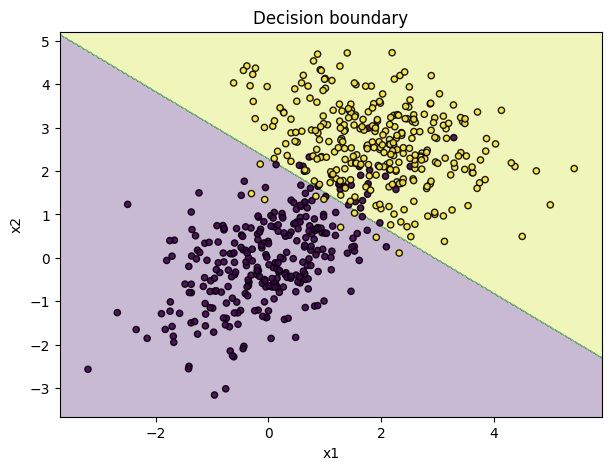

In [6]:
# fitting a linear SVM with hard margin
clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="linear", C=1e6)   # ~ hard margin if separable
)

clf.fit(X, y)          # X: (n,2), y: (n,)
plot_decision_boundary(clf, X, y)

#### Task 2.2 Test soft margin SVM without kernel projection

Soft-margin SVM (C=0.001)


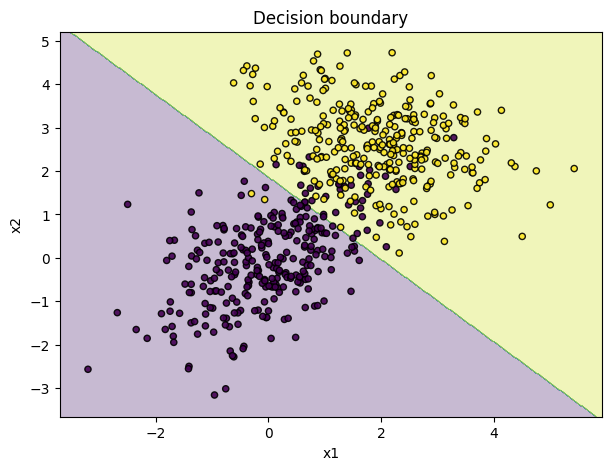

Soft-margin SVM (C=0.1)


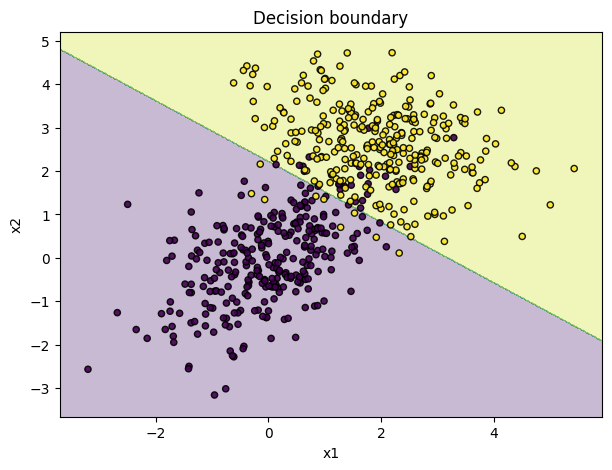

Soft-margin SVM (C=10)


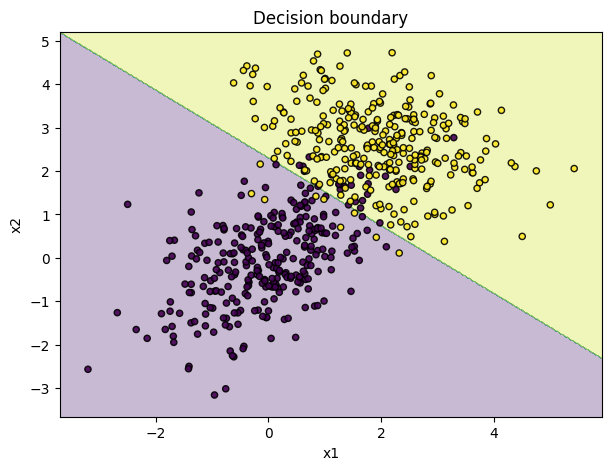

Soft-margin SVM (C=1000)


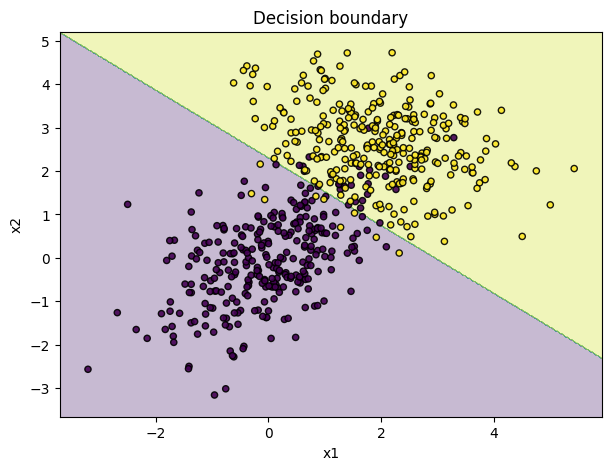

In [7]:
# fitting and comparing linear SVM with different soft margins
Cs = [0.001, 0.1, 10, 1000]

for C in Cs:
    clf = make_pipeline(
        StandardScaler(),
        SVC(kernel="linear", C=C)
    )
    clf.fit(X, y)
    print(f"Soft-margin SVM (C={C})")
    plot_decision_boundary(clf, X, y)

#### Task 2.3: Test non linear data.

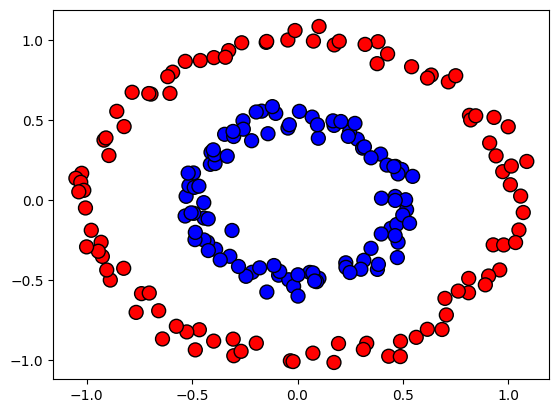

In [8]:
from sklearn import cluster, datasets

n_samples = 200
np.random.seed(seed=1)
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)

x = noisy_circles[0]
t = noisy_circles[1]
plt.scatter(x[:, 0], x[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)


#### Train SVM classifier with the RBF kernel:
    * Test difference gamma (1e-3, 1e+3) and margin values C (1e-3, 1e+2)

In [ ]:

gammas = np.logspace(-3, 3, 7)   # 1e-3 ... 1e+3
Cs     = np.logspace(-3, 2, 6)   # 1e-3 ... 1e+2


for C in Cs:
    for gamma in gammas:
        clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=C, gamma=gamma))
        clf.fit(x, t)
        
        print(f"C={C:.0e}\n,γ={gamma:.0e}")
        plot_decision_boundary(clf, x, t)

plt.tight_layout()
plt.show()

#### Task 2.4: Use cross-validation to determine best  `C` and `gamma` values (optional)





### Task 3: Test clustering on 'Moon data'

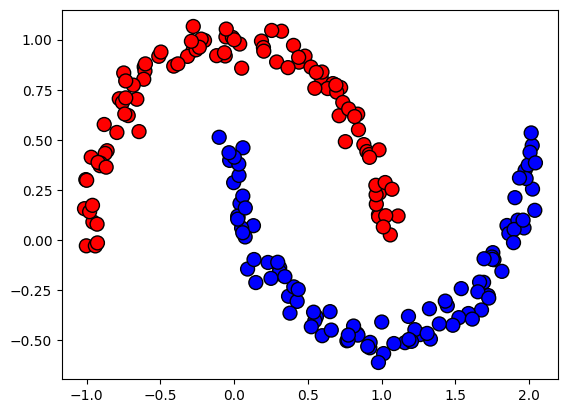

In [9]:
np.random.seed(seed=1)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
x_2 = noisy_moons[0]
t_2 = noisy_moons[1]
plt.scatter(x_2[:, 0], x_2[:, 1], c=t_2, cmap=cmap_bold, edgecolor='k', s=100)

## In-class task_1
#### Fit SVM on the "Moon data" and color each data point with its cluster membership  


#### Use RBF and soft margin parameter. Test different Gamma and C values.

### Task 3: Use Descision Tree on generated data

#### Task 3.1: Having the first bite of decision tree

<Figure size 700x500 with 0 Axes>

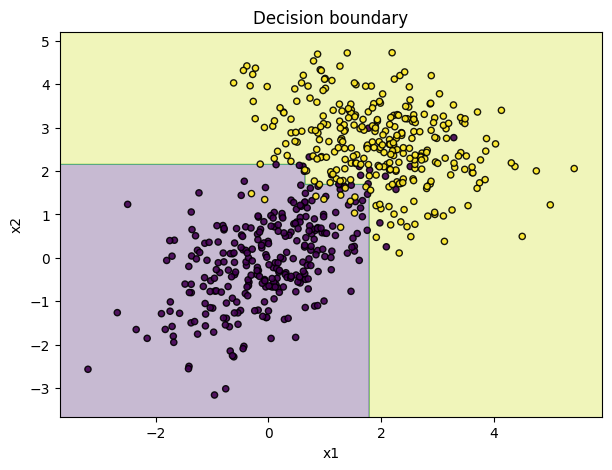

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X, y)

plt.figure(figsize=(7, 5))
plot_decision_boundary(tree, X, y)
plt.show()

#### Task 3.1: Having the first bite of decision tree

##### Testing with Gini impurity and Entropy

Decision Tree (criterion = gini)


<Figure size 1200x500 with 0 Axes>

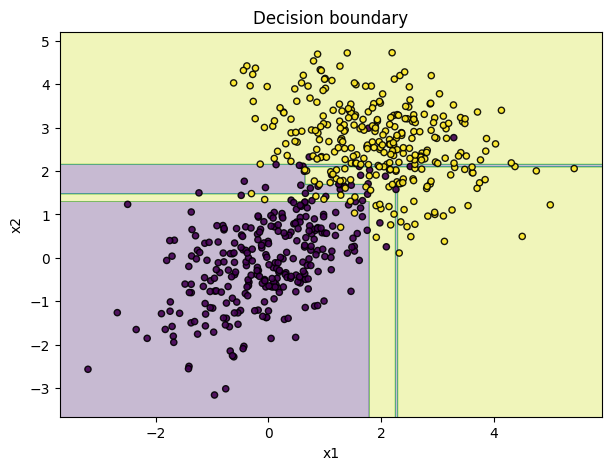

Decision Tree (criterion = entropy)


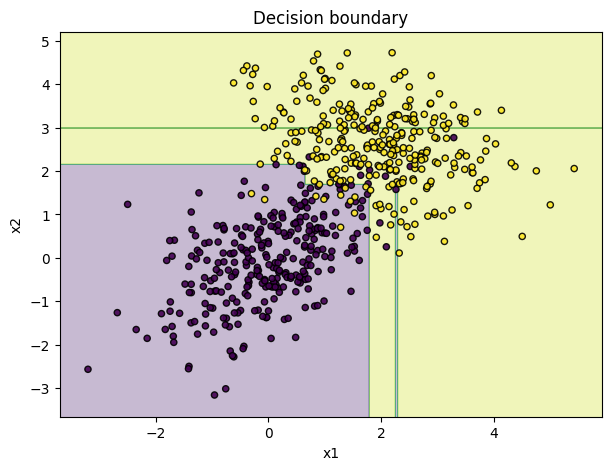

<Figure size 640x480 with 0 Axes>

In [33]:
common_params = dict(max_depth=4, random_state=42)

tree_gini = DecisionTreeClassifier(criterion="gini", **common_params).fit(X, y)
tree_ent  = DecisionTreeClassifier(criterion="entropy", **common_params).fit(X, y)

plt.figure(figsize=(12, 5))
print("Decision Tree (criterion = gini)")
plot_decision_boundary(tree_gini, X, y)


print("Decision Tree (criterion = entropy)")
plot_decision_boundary(tree_ent, X, y)

plt.tight_layout()
plt.show()

## In-class task_2: 

#### Using decision tree looking the boundaries: gini vs entropy for non-linear cycle data set

## In-class task_3: 

#### Using decision tree looking the boundaries: gini vs entropy for "Moon Dataset"